In [1]:
        from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape

57344/57026 [==============================] - 0s 4us/step


(404, 13)

In [2]:
mean = train_data.mean(axis=0)
train_data-= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [3]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [4]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [5]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [7]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k

num_epochs = 100

all_mae_histories = []

for i in range(k):
    print('folds # ', i)
    s = i*num_val_samples
    e = (i+1)*num_val_samples
    
    val_data = train_data[s:e]
    val_targets = train_targets[s:e]
    partial_train_data = np.concatenate([train_data[:s], train_data[e:]], axis=0)
    partial_train_targets = np.concatenate([train_data[:s], train_data[e:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    
#     val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history['mae']
    
    all_mae_histories.append(mae_history)
    
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]



folds #  0
folds #  1
folds #  2
folds #  3


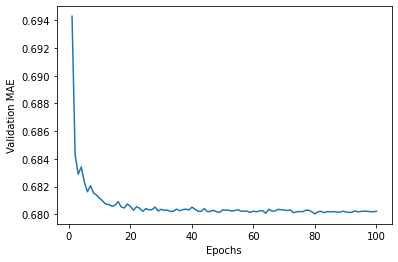

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()


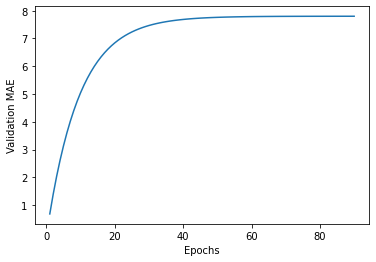

In [11]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous* factor + point + (1 - factor))
        else: 
            smoothed_points.append(point)

    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()

In [13]:
model = build_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)



4/4 [==============================] - 0s 3ms/step - loss: 20.5150 - mae: 2.8618


In [14]:
test_mse_score

20.515033721923828